In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from seaborn import lmplot
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 

In [2]:
dataframe = pd.read_excel(r"C:\Users\elkin\Desktop\ELHINMANGOS.xlsx")
dataframe.head(20)

,id,Meses,N.manchas,Color,Estado,Estado.1
0,objeto2,1,4,Verded,Verded,0
1,objeto3,2,5,Amarillo,Maduro,0
2,objeto4,4,3,Verded,Maduro,1
3,objeto5,5,6,Verded,Maduro,0
4,objeto6,6,7,Amarillo,Verded,1
5,objeto7,4,9,Verded,Maduro,0
6,objeto8,1,3,Amarillo,Maduro,0
7,objeto9,2,2,Verded,Maduro,1
8,objeto10,5,1,Amarillo,Maduro,0
9,objeto11,3,4,Verded,Maduro,1


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
dataframe.isnull().any()

id            False
Meses         False
 N.manchas    False
Color         False
Estado        False
Estado.1      False
dtype: bool

In [5]:
dataframe.describe()

,Meses,N.manchas,Estado.1
count,18.000000,18.000000,18.000000
mean,4.166667,4.722222,0.666667
std,2.382534,2.515962,0.485071
min,1.000000,1.000000,0.000000
25%,2.250000,3.000000,0.000000
50%,4.000000,4.500000,1.000000
75%,5.750000,6.750000,1.000000
max,9.000000,9.000000,1.000000


In [6]:
dataframe['Color'] = dataframe['Color'].map({'Verded':1,'Amarillo':0})

In [7]:
dataframe['Estado'] = dataframe['Estado'].map({'Verded':1,'Maduro':0})

In [8]:
dataframe.head()

,id,Meses,N.manchas,Color,Estado,Estado.1
0,objeto2,1,4,1,1,0
1,objeto3,2,5,0,0,0
2,objeto4,4,3,1,0,1
3,objeto5,5,6,1,0,0
4,objeto6,6,7,0,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

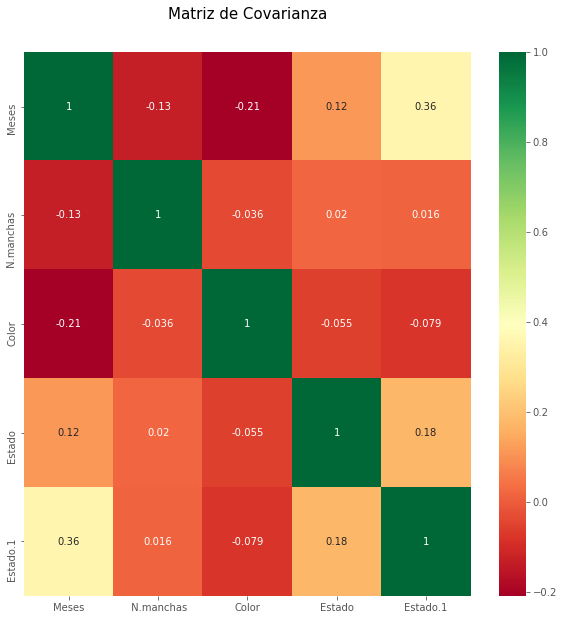

In [9]:
sns.heatmap(dataframe.corr(),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Matriz de Covarianza', y=1.05, size=15)
plt.show

In [10]:
print(dataframe.groupby('Estado.1').size())

Estado.1
0     6
1    12
dtype: int64


In [11]:
X = dataframe[['Meses','Color', 'Estado']].values
y = dataframe['Estado.1'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
escalar = StandardScaler()

In [14]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [15]:
algoritmo = LogisticRegression()

In [16]:
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = algoritmo.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,1
1,0,1
2,1,1
3,0,1


In [19]:
cnf_matrix = confusion_matrix(y_test, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_test.shape[0],(y_test != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_test != y_pred).sum()/y_test.shape[0]))

Cantidad de errores de clasificación sobre un total de 4 casos: 3
Efectividad del algoritmo:  0.25


In [20]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.25
